In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
df=pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

In [49]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df.shape

(150000, 21)

In [52]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Cus

In [53]:
print("Data Statistics")
print(df.describe(include='all'))

Data Statistics
              Date      Time    Booking ID Booking Status   Customer ID  \
count       150000    150000        150000         150000        150000   
unique         365     62910        148767              5        148788   
top     2024-11-16  17:44:57  "CNR7908610"      Completed  "CID4523979"   
freq           462        16             3          93000             3   
mean           NaN       NaN           NaN            NaN           NaN   
std            NaN       NaN           NaN            NaN           NaN   
min            NaN       NaN           NaN            NaN           NaN   
25%            NaN       NaN           NaN            NaN           NaN   
50%            NaN       NaN           NaN            NaN           NaN   
75%            NaN       NaN           NaN            NaN           NaN   
max            NaN       NaN           NaN            NaN           NaN   

       Vehicle Type Pickup Location Drop Location       Avg VTAT  \
count        15

In [54]:
print("Null Values per column")
print(df.isnull().sum())

Null Values per column
Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


In [55]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

In [56]:
df[['datetime']]

,datetime
0,2024-03-23 12:29:38
1,2024-11-29 18:01:39
2,2024-08-23 08:56:10
3,2024-10-21 17:17:25
4,2024-09-16 22:08:00
...,...
149995,2024-11-11 19:34:01
149996,2024-11-24 15:55:09
149997,2024-09-18 10:55:15
149998,2024-10-05 07:53:34


In [57]:
df['hour']=df['datetime'].dt.hour
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['weekday']=df['datetime'].dt.dayofweek
df['is_weekend']=df['datetime'].isin([5,6])
df[['datetime', 'hour', 'day', 'month', 'weekday', 'is_weekend']].head()

,datetime,hour,day,month,weekday,is_weekend
0,2024-03-23 12:29:38,12,23,3,5,False
1,2024-11-29 18:01:39,18,29,11,4,False
2,2024-08-23 08:56:10,8,23,8,4,False
3,2024-10-21 17:17:25,17,21,10,0,False
4,2024-09-16 22:08:00,22,16,9,0,False


In [58]:
df['is_cancelled_customer'] = df['Cancelled Rides by Customer'].notnull()
df['is_cancelled_driver'] = df['Cancelled Rides by Driver'].notnull()
df['is_incomplete'] = df['Incomplete Rides'].notnull()

In [59]:
df['missing_driver_rating'] = df['Driver Ratings'].isnull()
df['missing_customer_rating'] = df['Customer Rating'].isnull()
df['missing_booking_value'] = df['Booking Value'].isnull()
df['missing_payment_method'] = df['Payment Method'].isnull()

In [60]:
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())

In [61]:
df[['is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete',
    'missing_driver_rating', 'missing_customer_rating',
    'missing_booking_value', 'missing_payment_method']].sum()

is_cancelled_customer      10500
is_cancelled_driver        27000
is_incomplete               9000
missing_driver_rating      57000
missing_customer_rating    57000
missing_booking_value      48000
missing_payment_method     48000
dtype: int64

In [62]:
df['target_customer_cancelled'] = df['is_cancelled_customer'].astype(int)

In [63]:
df['target_customer_cancelled'].value_counts(normalize=True)

target_customer_cancelled
0    0.93
1    0.07
Name: proportion, dtype: float64

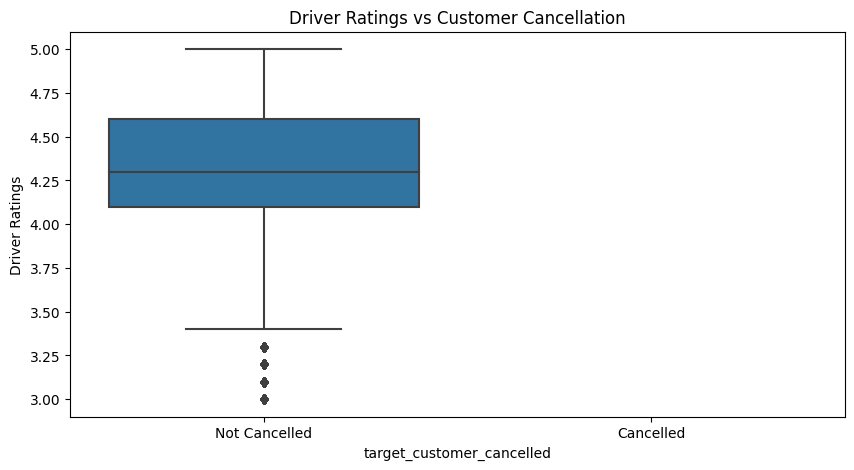

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='target_customer_cancelled', y='Driver Ratings')
plt.title("Driver Ratings vs Customer Cancellation")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

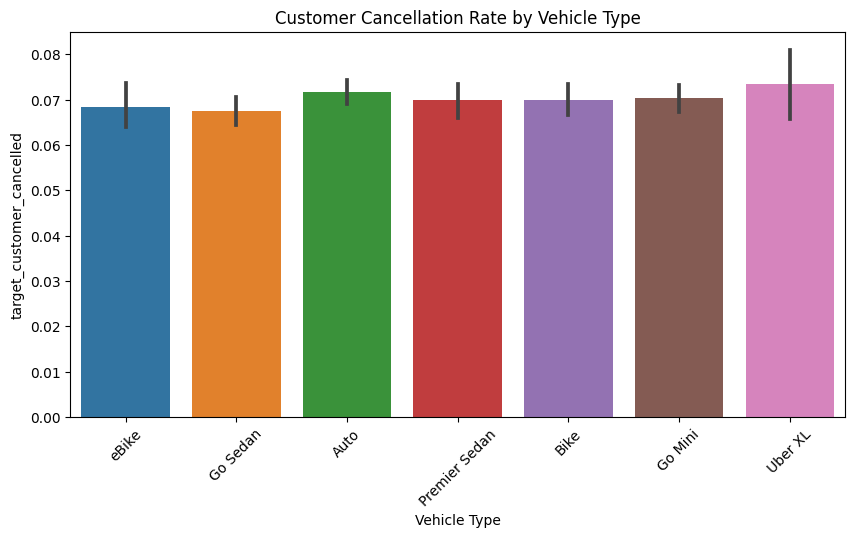

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Vehicle Type', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

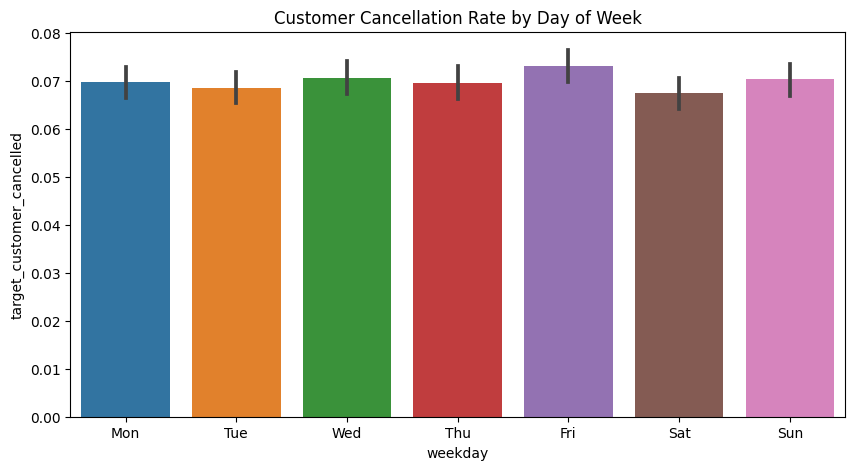

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='weekday', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Day of Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

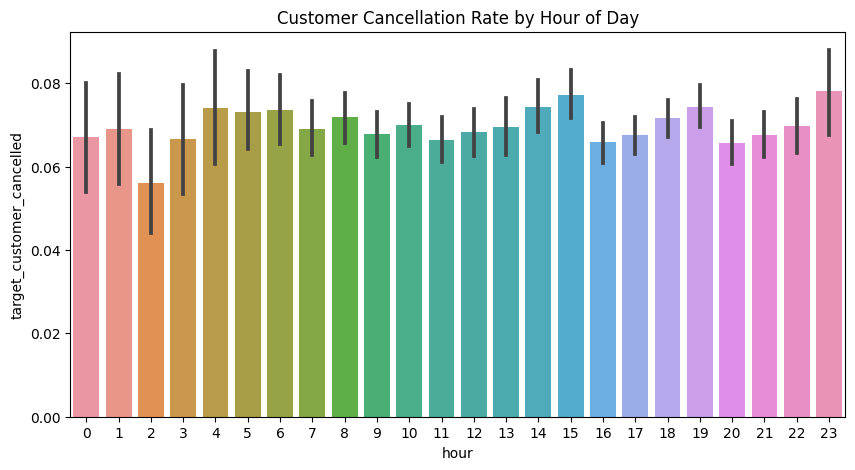

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='hour', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Hour of Day")
plt.show()

In [68]:
top_pickups = df['Pickup Location'].value_counts().nlargest(10).index
df_top_pickups = df[df['Pickup Location'].isin(top_pickups)]

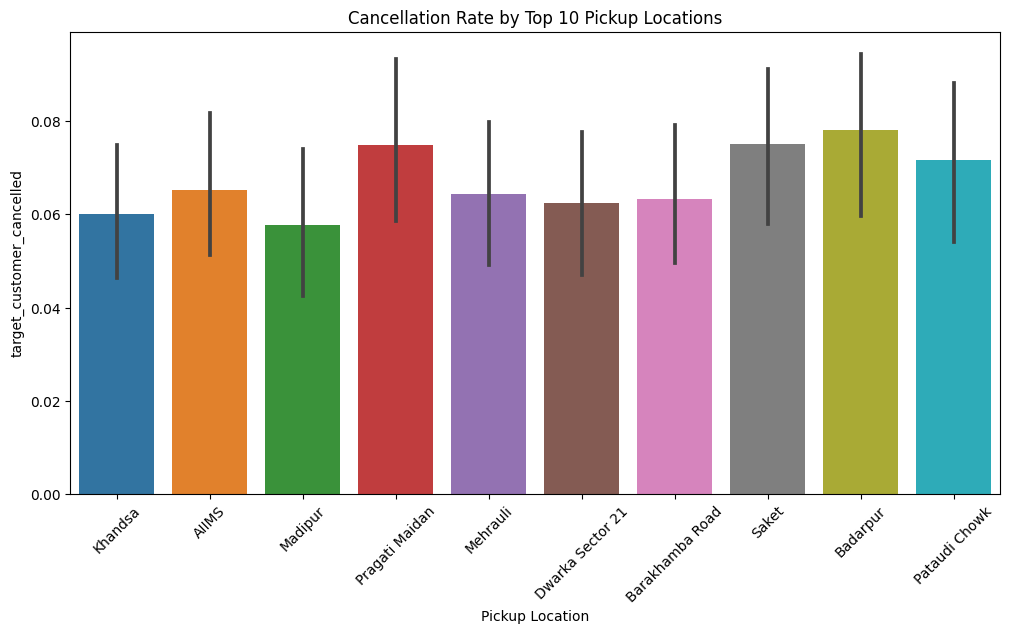

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_pickups, x='Pickup Location', y='target_customer_cancelled')
plt.title("Cancellation Rate by Top 10 Pickup Locations")
plt.xticks(rotation=45)
plt.show()

In [70]:
df_daily = df.groupby('Date')['target_customer_cancelled'].mean().reset_index()


In [71]:
df_daily

,Date,target_customer_cancelled
0,2024-01-01,0.060386
1,2024-01-02,0.079692
2,2024-01-03,0.052083
3,2024-01-04,0.074879
4,2024-01-05,0.067308
...,...,...
360,2024-12-26,0.062331
361,2024-12-27,0.064965
362,2024-12-28,0.084399
363,2024-12-29,0.076739


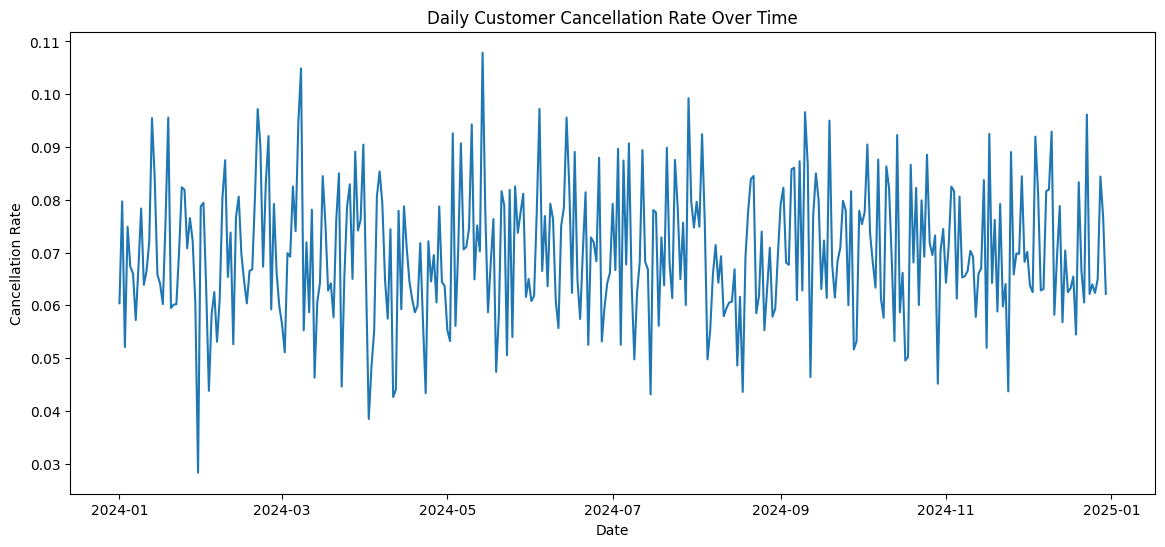

In [72]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_daily, x='Date', y='target_customer_cancelled')
plt.title("Daily Customer Cancellation Rate Over Time")
plt.ylabel("Cancellation Rate")
plt.xlabel("Date")
plt.show()

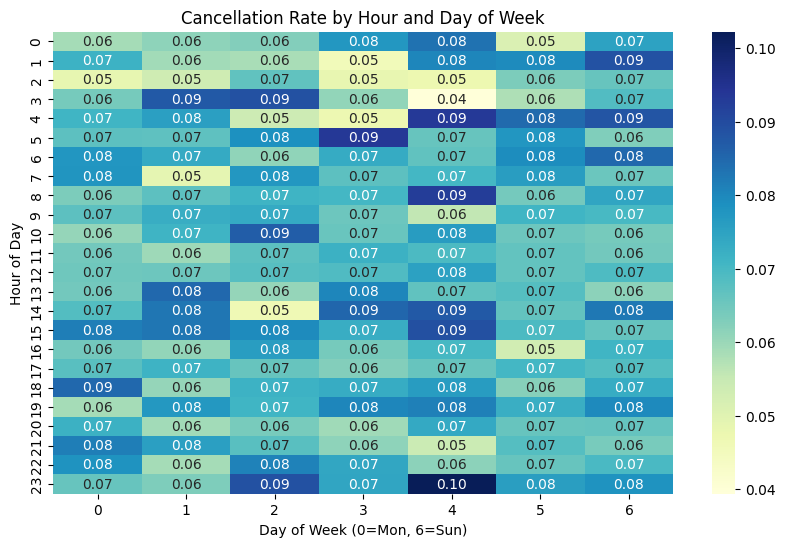

In [73]:
heatmap_data = df.pivot_table(
    index='hour',
    columns='weekday',
    values='target_customer_cancelled',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Cancellation Rate by Hour and Day of Week")
plt.ylabel("Hour of Day")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.show()


In [74]:
from sklearn.preprocessing import LabelEncoder

df = pd.get_dummies(df, columns=['Vehicle Type'], prefix='vehicle', drop_first=True)

top_pickups = df['Pickup Location'].value_counts().nlargest(10).index
df['pickup_encoded'] = df['Pickup Location'].apply(lambda x: x if x in top_pickups else 'Other')
df = pd.get_dummies(df, columns=['pickup_encoded'], prefix='pickup', drop_first=True)

top_drops = df['Drop Location'].value_counts().nlargest(10).index
df['drop_encoded'] = df['Drop Location'].apply(lambda x: x if x in top_drops else 'Other')
df = pd.get_dummies(df, columns=['drop_encoded'], prefix='drop', drop_first=True)

cust_counts = df['Customer ID'].value_counts().to_dict()
df['customer_total_bookings'] = df['Customer ID'].map(cust_counts)


num_cols = ['Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
df[num_cols] = df[num_cols].fillna(-1)

drop_cols = [
    'Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location',
    'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
    'Cancelled Rides by Driver', 'Driver Cancellation Reason',
    'Incomplete Rides', 'Incomplete Rides Reason', 'Date', 'Time', 'datetime'
]
df.drop(columns=drop_cols, inplace=True)

features = [col for col in df.columns if col != 'target_customer_cancelled']
target = 'target_customer_cancelled'

print(f"✅ Total Features for Modeling: {len(features)}")

✅ Total Features for Modeling: 47


In [75]:
df.shape

(150000, 48)

In [76]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=[0, 1],
    y=df['target_customer_cancelled']
)

weights = dict(enumerate(class_weights))
print("Class Weights:", weights)

Class Weights: {0: 0.5376344086021505, 1: 7.142857142857143}


In [77]:
import numpy as np

temp_df = df.copy()
temp_df['target'] = df[target]

numeric_cols = temp_df.select_dtypes(include=[np.number]).columns

correlations = temp_df[numeric_cols].corr()['target'].sort_values(key=abs, ascending=False)

print("Top Correlated Features with Target:\n")
print(correlations.drop('target'))

Top Correlated Features with Target:

target_customer_cancelled    1.000000
Customer Rating             -0.347451
Driver Ratings              -0.347266
Avg VTAT                     0.306592
Avg CTAT                    -0.008883
month                        0.001480
hour                         0.001475
customer_total_bookings      0.001330
day                         -0.000854
weekday                      0.000595
Booking Value                     NaN
Ride Distance                     NaN
Name: target, dtype: float64


In [78]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

# Clean feature set 
leaky_features = [
    'Avg VTAT', 'Ride Distance',
    'Booking Value', 'Customer Rating', 'Driver Ratings',
    'Booking Status', 'Payment Method',
    'missing_booking_value', 'missing_payment_method',
    'missing_driver_rating', 'missing_customer_rating',
    'is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete'
]
clean_features = [f for f in features if f not in leaky_features]

X = df[clean_features]
y = df['target_customer_cancelled']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=13.29,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(" ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\n Classification Report:\n", classification_report(y_test, y_pred, digits=3))

 ROC AUC Score: 0.8647787250384025

 Classification Report:
               precision    recall  f1-score   support

           0      0.994     0.746     0.852     27900
           1      0.218     0.937     0.353      2100

    accuracy                          0.760     30000
   macro avg      0.606     0.842     0.603     30000
weighted avg      0.939     0.760     0.818     30000



In [80]:
import pickle
pickle.dump(xgb_model,open('model.pkl','wb'))
pickle.dump(imputer,open('model2.pkl','wb'))


In [81]:
X.shape

(150000, 33)

In [83]:
clean_features

['Avg CTAT',
 'hour',
 'day',
 'month',
 'weekday',
 'is_weekend',
 'vehicle_Bike',
 'vehicle_Go Mini',
 'vehicle_Go Sedan',
 'vehicle_Premier Sedan',
 'vehicle_Uber XL',
 'vehicle_eBike',
 'pickup_Badarpur',
 'pickup_Barakhamba Road',
 'pickup_Dwarka Sector 21',
 'pickup_Khandsa',
 'pickup_Madipur',
 'pickup_Mehrauli',
 'pickup_Other',
 'pickup_Pataudi Chowk',
 'pickup_Pragati Maidan',
 'pickup_Saket',
 'drop_Basai Dhankot',
 'drop_Cyber Hub',
 'drop_Kalkaji',
 'drop_Kashmere Gate ISBT',
 'drop_Lajpat Nagar',
 'drop_Lok Kalyan Marg',
 'drop_Narsinghpur',
 'drop_Nehru Place',
 'drop_Other',
 'drop_Udyog Vihar',
 'customer_total_bookings']

In [84]:
import numpy as np
import random

vehicle_types = ['Bike', 'Go Mini', 'Go Sedan', 'Premier Sedan', 'Uber XL', 'eBike']
pickup_locations = ['Badarpur', 'Barakhamba Road', 'Dwarka Sector 21', 'Khandsa',
                    'Madipur', 'Mehrauli', 'Other', 'Pataudi Chowk', 'Pragati Maidan', 'Saket']
drop_locations = ['Basai Dhankot', 'Cyber Hub', 'Kalkaji', 'Kashmere Gate ISBT', 
                  'Lajpat Nagar', 'Lok Kalyan Marg', 'Narsinghpur', 'Nehru Place', 'Other', 'Udyog Vihar']

def one_hot_encode(value, categories):
    return [1 if value == cat else 0 for cat in categories]

found = False
attempt = 0

while not found and attempt < 10000:
    attempt += 1
    
    avg_ctat = random.uniform(10, 200)        
    hour = random.randint(0, 23)
    day = random.randint(1, 31)
    month = random.randint(1, 12)
    weekday = random.randint(0, 6)
    is_weekend = 1 if weekday >= 5 else 0
    customer_total_bookings = random.randint(0, 20)

    vehicle = random.choice(vehicle_types)
    pickup = random.choice(pickup_locations)
    drop = random.choice(drop_locations)

    input_vector = [avg_ctat, hour, day, month, weekday, is_weekend] + \
                   one_hot_encode(vehicle, vehicle_types) + \
                   one_hot_encode(pickup, pickup_locations) + \
                   one_hot_encode(drop, drop_locations) + \
                   [customer_total_bookings]
    
    input_imputed = imputer.transform([input_vector])
    
    pred = xgb_model.predict(input_imputed)[0]
    
    if pred == 1:
        print(f"Found cancellation example on attempt {attempt}:")
        print(f"avg_ctat: {avg_ctat:.2f}, hour: {hour}, day: {day}, month: {month}, weekday: {weekday}, is_weekend: {is_weekend}")
        print(f"vehicle: {vehicle}, pickup: {pickup}, drop: {drop}, customer_total_bookings: {customer_total_bookings}")
        found = True

if not found:
    print("No cancellation example found after 10,000 attempts.")


Found cancellation example on attempt 1859:
avg_ctat: 28.87, hour: 18, day: 8, month: 9, weekday: 1, is_weekend: 0
vehicle: Uber XL, pickup: Other, drop: Cyber Hub, customer_total_bookings: 16
